# <center> THE TITANIC DATASET ANALYSIS </center>

![Titanic 2](https://img.20mn.fr/CErtKaVbRdGYu9BfHjihKA/640x410_leonardo-dicaprio-kate-winslet-titanic.jpg)

In [1]:
from sklearn import preprocessing
from sklearn import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(data.shape, '\n')
print(data.dtypes)
test.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True, axis=1)
data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True, axis=1)

(891, 12) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
print(data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
data.head()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
# for i in data.columns:
#     print(data[i].value_counts(), '\n', '----------------------')

In [5]:
# print(data.nunique(axis=0))
# for i in data.columns:
#     if data[i].isnull().sum() / len(data) >0 :
#         print(i)
#         print(round(data[i].isnull().sum() / len(data), 2))
#percentage of missing values in a column

print('Column - Type - Number of modalities - Percentage of NAN')
print('----------------------------------------------------------------------')
for col in data.columns:
    print('%s - %s - %s - %s'%(col, data[col].dtypes, len(data[col].unique()), round(data[col].isnull().sum() / len(data), 3)))
print('----------------------------------------------------------------------')

Column - Type - Number of modalities - Percentage of NAN
----------------------------------------------------------------------
Survived - int64 - 2 - 0.0
Pclass - int64 - 3 - 0.0
Sex - object - 2 - 0.0
Age - float64 - 89 - 0.199
SibSp - int64 - 7 - 0.0
Parch - int64 - 7 - 0.0
Fare - float64 - 248 - 0.0
Embarked - object - 4 - 0.002
----------------------------------------------------------------------


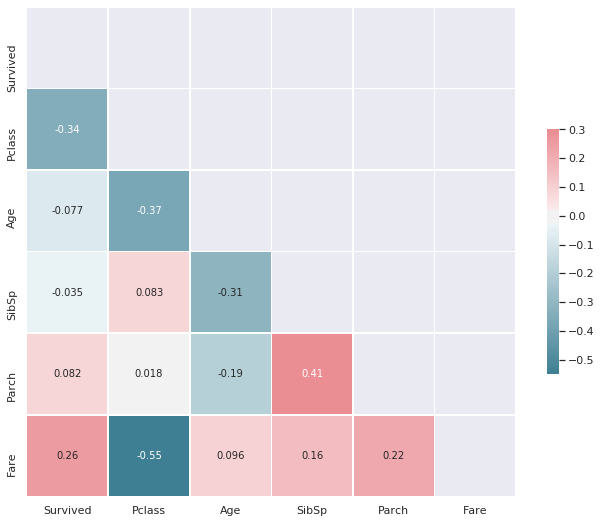

In [6]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [7]:
# sum up those related columns
data['fam_Size'] = data['SibSp'] + data['Parch'] +1
test['fam_Size'] = test['SibSp'] + test['Parch'] +1

In [8]:
#discretization for continuous variables
data['discretize_age'] = pd.cut(data['Age'], bins=[0,10,20,40,60,100])
data['discretize_fare'] = pd.cut(data['Fare'], bins=[0,10,15,30,100,550])
test['discretize_age'] = pd.cut(test['Age'], bins=[0,10,20,40,60,100])
test['discretize_fare'] = pd.cut(test['Fare'], bins=[0,10,15,30,100,550])


In [9]:
# import re as re
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# for d in data:
#     data['Title'] = data['Name'].apply(get_title)

# print(data['Title'], data['Sex'])

In [10]:
# for d in data:
#     data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Misc')

#     data['Title'] = data['Title'].replace('Mlle', 'Miss')
#     data['Title'] = data['Title'].replace('Ms', 'Miss')
#     data['Title'] = data['Title'].replace('Mme', 'Mrs')

# print (data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

In [11]:
# data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [12]:
# data.drop_duplicates()
# num = data[['Age', 'SibSp', 'Parch', 'Fare']]
# cat = data[['Sex', 'Pclass', 'Embarked']]
# sns.pairplot(num)


In [13]:
# def plot_box(data, cols, col_x = 'Survived'):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.boxplot(col_x, col, data=data)
#         plt.xlabel(col_x) # Set text for the x axis
#         plt.ylabel(col)# Set text for y axis
#         plt.show()

# d = data[data['Fare'] < 150 ]        
# plot_box(d , num)

In [14]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# d = data[data['Fare'] < 150 ]

# x = d['Age']
# y = d['Fare']
# z = d['SibSp']
 
# ax.scatter(x, y, z, c='g', marker='o')

# ax.set_xlabel('Age')
# ax.set_ylabel('Fare')
# ax.set_zlabel('SibSp')

# plt.show()

In [15]:
# g = sns.jointplot(x=d['Age'], y=d['Fare'], data=d,  kind="kde", color="r")
# g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$Age$", "$Fare$");

In [16]:
from sklearn.compose import make_column_selector

num = make_column_selector(dtype_include=np.number)
cat = make_column_selector(dtype_exclude=np.number)


In [17]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler
from  sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder


# imputerK = KNNImputer(n_neighbors=3)
# imputerK.fit_transform(num)
# scaler = RobustScaler()
# scaler.fit_transform(num)

# imputerM = SimpleImputer(strategy='most_frequent')
# imputerM.fit_transform(cat)
# encoder = OneHotEncoder()
# encoder.fit_transform(cat)

num_pipeline = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [18]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((num_pipeline, num), (cat_pipeline, cat))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = make_pipeline(preprocessor, RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(3),
              scoring='roc_auc'), LogisticRegression(random_state=0, class_weight={0:0.45, 1:0.55}, C=1))
model.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('knnimputer',
                                                                   KNNImputer(add_indicator=False,
                                                                              copy=True,
                                                                              metric='nan_euclidean',
                                                                              missing_values=nan,
                                                                              n_neighbors=3,
                                                          

In [48]:
# from sklearn.model_selection import GridSearchCV

# param = {'logisticregression__C':[0.1, 0.5, 1, 5, 10]} 

# ## Perform the grid search over the parameters
# clf = GridSearchCV(estimator = model, param_grid = param, 
#                       cv = 5, # Use the inside folds
#                       scoring = 'roc_auc',
#                       return_train_score = True)

# clf.fit(X, y)
# print(clf.best_params_)
# clf.best_score_

# {'logisticregression__C': 1}

In [49]:
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)

conf = sklm.confusion_matrix(y_test,y_pred)
conf = pd.DataFrame(conf,columns=['score_Dead', 'score_Survived'], index =['actual_Dead', 'actual_Survived']  )
print(conf)
print('Accuracy        %0.2f' % sklm.accuracy_score(y_test, y_pred))
metrics = sklm.precision_recall_fscore_support(y_test, y_pred)
print(' ')
print('            Dead      Survived')
print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1])
print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1])
print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1])
print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1])

                 score_Dead  score_Survived
actual_Dead             133              24
actual_Survived          28              83
Accuracy        0.81
 
            Dead      Survived
Num case   157.00     111.00
Precision   0.83      0.78
Recall      0.85      0.75
F1          0.84      0.76


AUC : 0.88


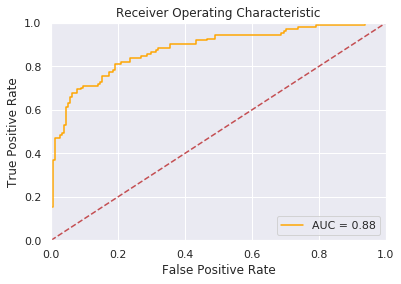

In [50]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    print('AUC :', round(auc, 2))
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, proba) 